This notebook will be to read in the data files I made of the mock observation (the mock observation itself, and the readout noise array and sky background array that were added to the signal).

It will compare the distributions to the expected values for the data

In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'

Load the data:

In [2]:
mockobs  = np.load('noisy_fov_1000.0hr_oldcam_100Mpcdist_14.0arcsec_20slwd.npz')['arr_0']
skynoise = np.load('noisy_fov_1000.0hr_oldcam_100Mpcdist_14.0arcsec_20slwd_BSKYARRAY.npz')['arr_0']
ronoise  = np.load('noisy_fov_1000.0hr_oldcam_100Mpcdist_14.0arcsec_20slwd_RARRAY.npz')['arr_0']

Plot up some histograms:

In [11]:
def plthist(ax,data1,data2=None,title='',label1='',label2='',ylim=None,xlim=None):
    ax.hist(np.ravel(data1),edgecolor='black', alpha = 0.5,label=label1+r', $\sigma_1$ = %.1f'%(np.std(data1)))
    if data2 is not None:
        ax.hist(np.ravel(data2),edgecolor='black', alpha = 0.5,label=label2+r', $\sigma_2$ = %.1f'%(np.std(data2)))
    #ax.text(0.6,0.7,r'$\sigma$_sb = %.1f'%(np.std(B_sky)),transform=ax.transAxes)
    #ax.text(0.6,0.6,r'$\sigma$_r = %.1f'%(np.std(R)),transform=ax.transAxes)
    if ylim is not None:
        ax.set_ylim(ylim)
    if xlim is not None:
        ax.set_xlim(xlim)
    ax.set_title(title)

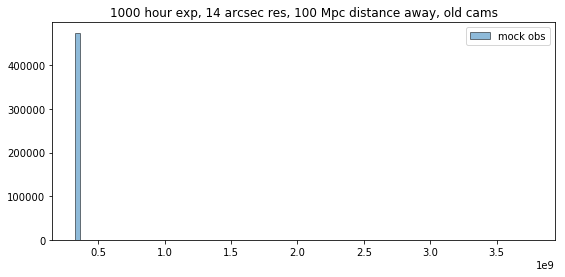

In [24]:
fig, (ax1) = plt.subplots(1, 1, figsize=(9, 4))
ax1.set_title('1000 hour exp, 14 arcsec res, 100 Mpc distance away, old cams')
ax1.hist(np.ravel(mockobs) ,edgecolor='black', alpha = 0.5,label='mock obs',bins=100)
#ax1.hist(np.ravel(skynoise),edgecolor='black', alpha = 0.5,label='sky noise')
#ax1.hist(np.ravel(ronoise) ,edgecolor='black', alpha = 0.5,label='ro noise')
plt.legend()
plt.show()

In [20]:
print np.median(mockobs)

327046391.954
